# Учёт запаздывания

Чтобы учесть запаздывание следует решить систему уравнений


$s=v\left( t-t' \right)+\frac{a}{2}{{\left( t-t' \right)}^{2}}$
и
$R=c\left( t-t' \right)$


In [1]:
var("t, t_prime, dt, v, a, c")

s_t = v*(t-t_prime) + a/2*(t-t_prime)^2
s_dt = v*dt + a/2*dt^2

R_t = c*(t-t_prime)
R_dt = c*dt

show(s_t)
show(R_t)

1/2*a*(t - t_prime)^2 + (t - t_prime)*v

c*(t - t_prime)

Учитывая, что по теореме косинусов

${{R}^{2}}={{R}_{0}}^{2}+{{s}^{2}}-2{{R}_{0}}s\cos \left( \alpha  \right)={{R}_{0}}^{2}+{{s}^{2}}-2{{R}_{0}}s\frac{{{z}_{q'}}-{{z}_{a'}}}{{{R}_{0}}}$

где ${R}_{0}$ расстояние от точки источника заряда к точке наблюдения без учёта запаздывания.

$\mathit{dz} = z_{a'} - z_{q'}$

$(t-t') = dt$

In [2]:
var("R_0, s, z_q, z_a, dz")
R_s = sqrt(R_0^2+s^2-2*s*(z_q-z_a))
show(R_s)

R_ds = sqrt(R_0^2+s^2+2*s*dz)
show(R_ds)

eq_dz = dz == z_a - z_q
show(eq_dz)

sqrt(R_0^2 + s^2 + 2*s*(z_a - z_q))

sqrt(R_0^2 + 2*dz*s + s^2)

dz == z_a - z_q

уравнение для вычисления запаздывающего момента принимает вид

$c^{2}\left( t-t' \right)^{2}={{R}_{0}}^{2}+{{s}^{2}}+2s\left( {{z}_{a'}}-{{z}_{q'}} \right)$

In [3]:
eq = R_t^2 == R_s^2
show(eq)

c^2*(t - t_prime)^2 == R_0^2 + s^2 + 2*s*(z_a - z_q)

In [4]:
eq = R_dt^2 == R_ds^2
show(eq)

eq1 = eq.subs(s == s_dt)
show(eq1)

c^2*dt^2 == R_0^2 + 2*dz*s + s^2

c^2*dt^2 == 1/4*(a*dt^2 + 2*dt*v)^2 + R_0^2 + (a*dt^2 + 2*dt*v)*dz

## Приближение малых скоростей с учётом запаздывания

Решение этой системы имеет весьма сложный вид,
но если мы исследуем вопрос какова будет инертная масса покоя,
то при решении этой системы мы можем положить $v = 0$.

In [5]:
var("dt2")
eq = eq1.subs(v == 0).subs(dt == sqrt(dt2)).expand()
# eq = eq1.subs(dt == sqrt(dt2)).expand()
eq = (eq.rhs() - eq.lhs()).collect(dt2) == 0
show(eq)

1/4*a^2*dt2^2 + R_0^2 - (c^2 - a*dz)*dt2 == 0

In [6]:
poly_coefs = eq.lhs().coefficients(dt2)
show(poly_coefs)

[[R_0^2, 0], [-c^2 + a*dz, 1], [1/4*a^2, 2]]

In [7]:
poly_dict = {}
for k, p in poly_coefs:
    poly_dict[p] = k
show(poly_dict)

{0: R_0^2, 1: -c^2 + a*dz, 2: 1/4*a^2}

In [8]:
discriminant = poly_dict[1]^2 - 4 * poly_dict[0] * poly_dict[2]
show(discriminant)

-R_0^2*a^2 + (c^2 - a*dz)^2

In [9]:
sol_dt2 = (- poly_dict[1] + sqrt(discriminant)) / (2 * poly_dict[2])
show(sol_dt2)

2*(c^2 - a*dz + sqrt(-R_0^2*a^2 + (c^2 - a*dz)^2))/a^2


В этом случае для нахождения запаздывания нужно будет решить уравнение

$-\frac{1}{4} \, a^{2} \mathit{dt}^{4} + c^{2} \mathit{dt}^{2} - a \mathit{dt}^{2} {\left(z_{a} - z_{q}\right)} - R_{0}^{2} = 0$

где
$(t-t') = dt$

Это уравнение имеет 4 решения, 

In [10]:
solution = solve(eq, dt2)
for sol in solution:
    show(sol)

dt2 == 2*(c^2 - a*dz - sqrt(-R_0^2*a^2 + c^4 - 2*a*c^2*dz + a^2*dz^2))/a^2

dt2 == 2*(c^2 - a*dz + sqrt(-R_0^2*a^2 + c^4 - 2*a*c^2*dz + a^2*dz^2))/a^2

In [11]:
var("D")
sol_dt2_a = (- poly_dict[1] + sqrt(D)) / (2 * poly_dict[2])
sol_dt2_b = (- poly_dict[1] - sqrt(D)) / (2 * poly_dict[2])
show(sol_dt2_a)
show(sol_dt2_b)
show(discriminant)
import sympy as sp
print(sp.ccode(eq_dz.rhs()._sympy_(), assign_to = "dz"))
print(sp.ccode(discriminant._sympy_(), assign_to = "D"))
print(sp.ccode(sol_dt2_a._sympy_(), assign_to = "dt2_a"))
print(sp.ccode(sol_dt2_b._sympy_(), assign_to = "dt2_b"))

2*(c^2 - a*dz + sqrt(D))/a^2

2*(c^2 - a*dz - sqrt(D))/a^2

-R_0^2*a^2 + (c^2 - a*dz)^2

dz = z_a - z_q;
D = -pow(R_0, 2)*pow(a, 2) + pow(-a*dz + pow(c, 2), 2);
dt2_a = 2*(sqrt(D) - a*dz + pow(c, 2))/pow(a, 2);
dt2_b = 2*(-sqrt(D) - a*dz + pow(c, 2))/pow(a, 2);


но физически приемлемый смысл при положительном ускорении имеет решение


% $\mathit{dt} = -\frac{\sqrt{2 \, c^{2} - 2 \, a \mathit{dz} + 2 \, \sqrt{-R_{0}^{2} a^{2} + c^{4} - 2 \, a c^{2} \mathit{dz} + a^{2} \mathit{dz}^{2}}}}{a}$

% $\mathit{dt} = \frac{\sqrt{2 \, c^{2} - 2 \, a \mathit{dz} + 2 \, \sqrt{-R_{0}^{2} a^{2} + c^{4} - 2 \, a c^{2} \mathit{dz} + a^{2} \mathit{dz}^{2}}}}{a}$

% $\mathit{dt} = -\frac{\sqrt{2 \, c^{2} - 2 \, a \mathit{dz} - 2 \, \sqrt{-R_{0}^{2} a^{2} + c^{4} - 2 \, a c^{2} \mathit{dz} + a^{2} \mathit{dz}^{2}}}}{a}$

$\mathit{dt} = \frac{\sqrt{2 \, c^{2} - 2 \, a \mathit{dz} - 2 \, \sqrt{-R_{0}^{2} a^{2} + c^{4} - 2 \, a c^{2} \mathit{dz} + a^{2} \mathit{dz}^{2}}}}{a}$

где

$\mathit{dz} = z_{a'} - z_{q'}$

В приближении малых скоростей ${}^{v}/{}_{c}\ll 1$ но при учете запаздывания
$$\overrightarrow{E}=\int\limits_{{{r}_{q}}}\int\limits_{{{\varphi}_{q}}}\int\limits_{{{\theta}_{q}}}\\
{\left\{ -\frac{\overrightarrow{a}R}{{{c}^{2}}} \right\}\frac{\rho \left( {{r}_{q}} \right){{r}_{q}}^{2}\sin \left( {{\theta }_{q}} \right)}{{{R}^{*}}^{2}}\ }d{{\theta }_{q}}d{{\varphi }_{q}}d{{r}_{q}}$$
 Откуда
$${{F}_{z}}=-\frac{\overrightarrow{a}}{{{c}^{^{2}}}}\int\limits_{{{V}_{a}}}{\int\limits_{{{V}_{q}}}{\frac{\rho \left( {{r}_{q}} \right)\rho \left( {{r}_{a}} \right)}{R}}}\ d{{V}_{q}}d{{V}_{a}}$$
где
$\mathit{R} = c\frac{\sqrt{2 \, c^{2} - 2 \, a \mathit{dz} - 2 \, \sqrt{-R_{0}^{2} a^{2} + c^{4} - 2 \, a c^{2} \mathit{dz} + a^{2} \mathit{dz}^{2}}}}{a}$

```
static inline cubareal R_a (cubareal ra, cubareal theta_a, cubareal rq, cubareal theta_q, cubareal phi_q, cubareal c, cubareal a)
{
    cubareal R_0 = R0 (ra, theta_a, rq, theta_q, phi_q);
    cubareal dz = za(ra, theta_a) - zq(rq, theta_q);

    //cubareal tt1 = -2*a*dz + 2*sqrt(-2*a*dz*Sq(c) - Sq(R_0)*Sq(a) + Sq(a)*Sq(dz) + Qu(c)) + 2*Sq(c);
    //cubareal tt2 = -2*a*dz - 2*sqrt(-2*a*dz*Sq(c) - Sq(R_0)*Sq(a) + Sq(a)*Sq(dz) + Qu(c)) + 2*Sq(c);

    cubareal R = c/a*sqrt(2*Sq(c) - 2*a*dz - 2*sqrt(-Sq(R_0*a) + Qu(c) - 2*a*Sq(c)*dz + Sq(a*dz) ) );

    //printf("tt1 = %f, tt2 = %f, R = %f R0 = %f , ra = %f, theta_a = %f, rq = %f, theta_q = %f, phi_q = %f\n", tt1, tt2, R, R_0, ra, theta_a, rq, theta_q, phi_q);
    return R;
}
```

In [12]:
import ctypes
from ctypes.util import find_library

def unload_lib(lib):
    """Unload the loaded CDLL library from memory."""
    if not hasattr(lib, "_handle"):
        raise ValueError("Object is not a loaded CDLL library.")
    
    # Ищем libdl
    libdl_path = find_library("dl")
    if not libdl_path:
        raise RuntimeError("libdl not found — unloading .so is not possible.")
    
    libdl = ctypes.CDLL(libdl_path)

    dlclose = libdl.dlclose
    dlclose.argtypes = [ctypes.c_void_p]
    dlclose.restype = ctypes.c_int

    handle = lib._handle
    ret = dlclose(handle)

    if ret == 0:
        print(f"✅ Library {lib._name} unloaded from memory.")
        return True
    else:
        # you can call ctypes.get_errno(), but dlclose does not set errno on all systems
        print(f"❌ dlclose returned code {ret}. Library may not be unloaded.")
        return False

In [13]:
# after loading:
#lib = ctypes.CDLL("./mendrive_det.so")

# ... work ...

# before recompilation:
if 'lib_inductive' in locals():
    unload_lib(lib)
    del lib
    import gc; gc.collect()


# before recompilation:
if 'lib_gradient' in locals():
    unload_lib(lib)
    del lib
    import gc; gc.collect()

# we recompile
#!gcc -shared -fPIC -O3 -o mendrive_det.so mendrive_det.c -lm

# we load again
#lib = ctypes.CDLL("./mendrive_det.so")

In [14]:
def rm_lib(name):
    import os 
    
    cmd = "rm {name}.so".format(name=name)

    # Using os.system() method
    os.system(cmd)

In [15]:
def compile_lib(name):
    import os 
    # Command to execute -lgsl -lgslcblas -lm
    # cmd = "gcc -shared -fPIC -O3 -o {name}.so {name}.c -lm".format(name=name)
    
    cmd = """gcc -shared -fPIC -O3 -o {name}.so \
        {name}.c \
        -DINCLUDE_CUBA_H \
        -I./local/include \
        -L./local/lib \
        -Wl,-rpath='\\$ORIGIN/local/lib' \
        -lcuba -lm
    """.format(name=name)

    # Using os.system() method
    os.system(cmd)

In [16]:
rm_lib("calc_inductive_sphere_mass_a")
rm_lib("calc_gradient_sphere_mass_a")

In [17]:
compile_lib("calc_inductive_sphere_mass_a")
compile_lib("calc_gradient_sphere_mass_a")

In [18]:
def load_and_init_lib(name):
    import ctypes
    from ctypes import Structure, c_double, c_int, c_longdouble, POINTER, CDLL, byref

    # Loading the library
    lib = CDLL("./{name}.so".format(name=name))

    # Function binding
    lib.integrate.argtypes = [
        c_double, # r0,       /* Радиус сферы */
        c_double, # q ,       /* заряд */
        c_double, # a,        /* Продольное ускорение */
        c_double, # c,        /* Скорость света */
        POINTER(c_double), # cubareal* integral
        POINTER(c_double), # cubareal* error
        POINTER(c_double), # cubareal* prob)
    ]
    lib.integrate.restype  = c_int

   
    return lib

# Function call:
def c_integrate(lib,
                r0,       # /* Радиус сферы */
                q,        # /* заряд */
                a,        # /* Продольное ускорение */
                c         # /* Скорость света */
                ):

    import ctypes
    from ctypes import c_int,  c_double,  POINTER, byref
    import numpy as np

    NCOMP = 1
    integ = np.zeros(NCOMP, dtype=np.float64)
    error = np.zeros(NCOMP, dtype=np.float64)
    prob  = np.zeros(NCOMP, dtype=np.float64)

    lib.integrate(c_double(r0),
                  c_double(q),
                  c_double(a),
                  c_double(c),
                  integ.ctypes.data_as(POINTER(c_double)),
                  error.ctypes.data_as(POINTER(c_double)),
                  prob.ctypes.data_as(POINTER(c_double))
    )
    
    result_names = [
        "observed_ratio_1_x ",
        "observed_ratio_1_y ",
        "observed_ratio_1_z ",
        "observed_ratio_2_x ",
        "observed_ratio_2_y ",
        "observed_ratio_2_z ",
        "observed_ratio_x   ",
        "observed_ratio_y   ",
        "observed_ratio_z   "];
    for comp in range(0, 1):
        print(result_names[comp], integ[comp], error[comp], prob[comp])
        
    return integ, error, prob

In [19]:
lib_inductive = load_and_init_lib("calc_inductive_sphere_mass_a")

In [20]:
lib_gradient = load_and_init_lib("calc_gradient_sphere_mass_a")

In [21]:
def calc_inductive_and_gradient_sphere_mass(lib,
                                  a):
    r0 = 1;      # /* радиус сферы (половина R1) */
    q  = 1
    c  = 1;      # /* скорость света в м/с */

    integ, error, prob = c_integrate(lib,
                r0, #   /* Радиус сферы */
                q,  #   /* заряд */
                a,  #   /* ускорение */
                c   #   /* Скорость света */
                )
    return integ[0]

In [22]:
calc_inductive_and_gradient_sphere_mass(lib_inductive, a = 0)

-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -nan +- 7.02518e-18  	chisq -nan (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -nan +- 4.44267e-18  	chisq -nan (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -nan +- 3.31115e-18  	chisq -nan (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -nan +- 2.6547e-18  	chisq -nan (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -nan +- 2.221e-18  	chisq -nan (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -nan +- 1.91148e-18  	chisq -nan (5 df)

Iteration 7:  17500 integrand evaluations so far
[1] -nan +- 1.67884e-18  	chisq -nan (6 df)

Iteration 8:  22000 integrand evaluations so far
[1] -nan +- 1.4973e-18  	chisq -nan (7 d

nan

In [23]:
calc_inductive_and_gradient_sphere_mass(lib_gradient, a = 0)

VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	-nan +- 0.00000000	p = -nan
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -nan +- 7.02518e-18  	chisq -nan (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -nan +- 4.44267e-18  	chisq -nan (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -nan +- 3.31115e-18  	chisq -nan (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -nan +- 2.6547e-18  	chisq -nan (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -nan +- 2.221e-18  	chisq -nan (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -nan +- 1.91148e-18  	chisq -nan (5 df)

Iteration 7:  17500 integrand evaluations so far
[1] -nan +- 1.67884e-18  	chisq -nan (6 df)

Iteration 8: 

nan

In [24]:
mass_array                  = []
mass_fermi_array            = []
mass_hysteresis_array       = []
mass_hysteresis_lw_array    = []
mass_hysteresis_fermi_array = []

In [25]:
def append_mass_hysteresis(va):
    global mass_array
    global mass_fermi_array
    global mass_hysteresis_array
    global mass_hysteresis_lw_array
    global mass_hysteresis_fermi_array

    for a in va:
        inductive_ratio_z \
            = calc_inductive_and_gradient_sphere_mass(lib_inductive, a = a)
        gradient_ratio_z \
            = calc_inductive_and_gradient_sphere_mass(lib_gradient,  a = a)

        m1 = gradient_ratio_z
        m2 = inductive_ratio_z

        mass_array += [(a, m1, m2)]
#         mass_fermi_array += [(a, m1_f, m2_f)]
#         mass_hysteresis_array += [(a, m, m_f)]
#         mass_hysteresis_lw_array += [(a, m)]
#         mass_hysteresis_fermi_array += [(a, m_f)]

In [26]:
use_lorentz_factor = 0

In [27]:
append_mass_hysteresis([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,
                        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2,
                        0.21, 0.22, 0.23, 0.24, 0.25, 0.26])

VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	-nan +- 0.00000000	p = -nan
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20466 +- 0.0831824  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20509 +- 0.0291484  	chisq 3.07641e-05 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20613 +- 0.016507  	chisq 0.00190125 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20091 +- 0.0102098  	chisq 0.16354 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.2007 +- 0.00778478  	chisq 0.164587 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20038 +- 0.00620177  	chisq 0.169282 (5 df)

Iteration 7:  17500 integrand evaluations so far
[1] -1.19862 +- 0.0050

observed_ratio_1_x  0.40023599829602813 0.00044364136716260554 3.235577300619461e-12
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.40023600 +- 0.00044364	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.2046 +- 0.0831876  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20597 +- 0.0291604  	chisq 0.000306019 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20645 +- 0.0163473  	chisq 0.000700146 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20144 +- 0.0101318  	chisq 0.153321 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20089 +- 0.00769155  	chisq 0.160187 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20056 +- 0.00614236  

observed_ratio_1_x  0.4002857659203585 0.0004448502044457658 1.2527746049310187e-11
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.40028577 +- 0.00044485	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20452 +- 0.0831919  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20614 +- 0.0291788  	chisq 0.00043563 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.2059 +- 0.0161862  	chisq 0.000533914 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20131 +- 0.0100462  	chisq 0.131589 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20051 +- 0.00760481  	chisq 0.146493 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20044 +- 0.00609182  	c

observed_ratio_1_x  0.4003067790486406 0.0004468933658055016 1.6283853674600357e-13
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.40030678 +- 0.00044689	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.2044 +- 0.0831952  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.2065 +- 0.0292928  	chisq 0.00073224 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20573 +- 0.0162338  	chisq 0.00173576 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20081 +- 0.0100314  	chisq 0.150455 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.20006 +- 0.00758881  	chisq 0.163506 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20018 +- 0.00608761  	chi

observed_ratio_1_x  0.4002565492350232 0.0004484960996133396 1.4113978023277466e-12
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.40025655 +- 0.00044850	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20424 +- 0.0831976  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20663 +- 0.0293089  	chisq 0.000937722 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20497 +- 0.0159622  	chisq 0.0054508 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.20071 +- 0.00995201  	chisq 0.122327 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19975 +- 0.00748435  	chisq 0.14343 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.20021 +- 0.00604043  	c

observed_ratio_1_x  0.400115906503778 0.0004465281246887003 2.4502049710918057e-10
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.40011591 +- 0.00044653	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20405 +- 0.0831991  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.2068 +- 0.0293262  	chisq 0.0012466 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20535 +- 0.0161663  	chisq 0.00475974 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.2003 +- 0.00997806  	chisq 0.162368 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19938 +- 0.00750245  	chisq 0.181807 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.1999 +- 0.00605317  	chisq

observed_ratio_1_x  0.399965803709852 0.0004418120052745356 3.099729461362362e-11
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39996580 +- 0.00044181	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20382 +- 0.0831996  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20647 +- 0.0293024  	chisq 0.00115778 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20512 +- 0.0160741  	chisq 0.00419892 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.1995 +- 0.00990389  	chisq 0.201436 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.1987 +- 0.00743794  	chisq 0.216309 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19942 +- 0.00601249  	chis

observed_ratio_1_x  0.3999378618070433 0.00044375267135574064 3.3248577726642324e-10
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39993786 +- 0.00044375	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20356 +- 0.0831992  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20623 +- 0.0292933  	chisq 0.00117355 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20479 +- 0.0159669  	chisq 0.00460724 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19995 +- 0.00989171  	chisq 0.15373 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19862 +- 0.00738082  	chisq 0.194664 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.199 +- 0.00596008  	ch

observed_ratio_1_x  0.3999141300017417 0.000446717344180476 8.959893819349844e-10
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39991413 +- 0.00044672	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20326 +- 0.0831978  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20522 +- 0.0292576  	chisq 0.000632122 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20428 +- 0.0158359  	chisq 0.00211186 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19949 +- 0.00978681  	chisq 0.149586 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19783 +- 0.00725754  	chisq 0.213886 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19827 +- 0.00588059  	c

observed_ratio_1_x  0.39977047018885387 0.0004458069601785645 5.811602295727294e-10
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39977047 +- 0.00044581	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20293 +- 0.0831955  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20436 +- 0.0292837  	chisq 0.000339285 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.2035 +- 0.0157731  	chisq 0.00156137 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19926 +- 0.00976575  	chisq 0.118862 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19733 +- 0.00723332  	chisq 0.205395 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19775 +- 0.00585952  	

observed_ratio_1_x  0.39959782908761327 0.0004468330458247665 2.1519499792852226e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39959783 +- 0.00044683	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20256 +- 0.0831922  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20501 +- 0.0296821  	chisq 0.00099862 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20392 +- 0.0157989  	chisq 0.00288069 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19913 +- 0.00975691  	chisq 0.151466 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19684 +- 0.0072044  	chisq 0.272795 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19715 +- 0.00583562  	

observed_ratio_1_x  0.3995228076969643 0.00044535512316923786 3.357719425288709e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39952281 +- 0.00044536	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20215 +- 0.0831879  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20533 +- 0.0299271  	chisq 0.00168081 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20352 +- 0.0158533  	chisq 0.00676232 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19885 +- 0.00978439  	chisq 0.146895 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19635 +- 0.0072161  	chisq 0.289963 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19667 +- 0.00583941  	c

observed_ratio_1_x  0.3993775036890447 0.000443474827027935 1.595512962512088e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39937750 +- 0.00044347	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.2017 +- 0.0831826  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20564 +- 0.0299648  	chisq 0.00257994 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.2033 +- 0.0158225  	chisq 0.0110188 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19849 +- 0.00976629  	chisq 0.160531 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.1958 +- 0.00719561  	chisq 0.325859 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19614 +- 0.00582288  	chisq 

observed_ratio_1_x  0.39927623076179264 0.00044330183862676206 3.462935914629076e-08
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39927623 +- 0.00044330	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20121 +- 0.0831764  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20655 +- 0.0300225  	chisq 0.00473392 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20269 +- 0.0156985  	chisq 0.027479 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19799 +- 0.00967408  	chisq 0.171785 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.1951 +- 0.00713339  	chisq 0.368439 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19566 +- 0.00580363  	ch

observed_ratio_1_x  0.3991254068125145 0.0004418806839887876 7.23174054322288e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39912541 +- 0.00044188	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20068 +- 0.0831691  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20552 +- 0.0298951  	chisq 0.00387589 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20459 +- 0.0160848  	chisq 0.00524182 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19876 +- 0.00988798  	chisq 0.216158 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.1955 +- 0.00725176  	chisq 0.451053 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19571 +- 0.00587154  	chi

observed_ratio_1_x  0.39893502370061984 0.0004416061348535094 2.9004397988866884e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39893502 +- 0.00044161	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.20012 +- 0.0831608  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20607 +- 0.0300365  	chisq 0.00589987 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20413 +- 0.0159113  	chisq 0.0117077 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19788 +- 0.00980756  	chisq 0.260737 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19445 +- 0.00718839  	chisq 0.525613 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19479 +- 0.00582626  	

observed_ratio_1_x  0.398786703964559 0.0004419678379951579 8.034926500752533e-10
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39878670 +- 0.00044197	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19951 +- 0.0831514  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20659 +- 0.0302656  	chisq 0.00837185 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20386 +- 0.0160366  	chisq 0.0196594 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.1968 +- 0.00981526  	chisq 0.330291 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19362 +- 0.00715556  	chisq 0.553454 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19401 +- 0.0058091  	chisq

observed_ratio_1_x  0.39855923108807384 0.0004399702753006733 3.947546875307484e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39855923 +- 0.00043997	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19885 +- 0.0831411  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20547 +- 0.0301155  	chisq 0.00729298 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20249 +- 0.0161374  	chisq 0.0209927 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19683 +- 0.00993616  	chisq 0.219516 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19336 +- 0.00724611  	chisq 0.479889 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19365 +- 0.00584773  	c

observed_ratio_1_x  0.39837448373733914 0.0004402069513780195 3.4917594585751988e-09
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39837448 +- 0.00044021	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19815 +- 0.0831296  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20532 +- 0.0301952  	chisq 0.00857109 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.2014 +- 0.0160139  	chisq 0.0320547 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19535 +- 0.00983963  	chisq 0.261575 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.1923 +- 0.00717943  	chisq 0.466222 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19266 +- 0.00581453  	ch

observed_ratio_1_x  0.3981898944887229 0.0004395092754575893 1.4732070237097165e-10
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39818989 +- 0.00043951	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19741 +- 0.083117  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20454 +- 0.030181  	chisq 0.00849809 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20134 +- 0.0161085  	chisq 0.0242248 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19478 +- 0.00989019  	chisq 0.290551 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.1917 +- 0.00720428  	chisq 0.497808 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19197 +- 0.00582618  	chis

observed_ratio_1_x  0.3979749585753886 0.0004394969176710988 8.997750398688474e-12
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39797496 +- 0.00043950	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19661 +- 0.0831033  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20305 +- 0.0299949  	chisq 0.00691163 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.20036 +- 0.0160118  	chisq 0.0181992 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19448 +- 0.00988355  	chisq 0.235743 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.19053 +- 0.00717188  	chisq 0.573678 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.1908 +- 0.00579048  	chi

observed_ratio_1_x  0.3977957448438605 0.00044212222663281747 3.3181459637504386e-12
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39779574 +- 0.00044212	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19576 +- 0.0830885  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20214 +- 0.0300105  	chisq 0.00676506 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.19975 +- 0.0160446  	chisq 0.0156345 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19374 +- 0.00986525  	chisq 0.240971 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.18996 +- 0.00716837  	chisq 0.551749 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.19006 +- 0.00578298  	

observed_ratio_1_x  0.39749050489882576 0.000440824908275224 7.38594105498351e-13
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39749050 +- 0.00044082	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19487 +- 0.0830725  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20259 +- 0.0300546  	chisq 0.00994039 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.19909 +- 0.016031  	chisq 0.0289058 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.1926 +- 0.00985282  	chisq 0.291804 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.18878 +- 0.00714154  	chisq 0.608435 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.18893 +- 0.00576393  	chisq

observed_ratio_1_x  0.3973833574011581 0.00044453084135058816 4.844042984624393e-12
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39738336 +- 0.00044453	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19391 +- 0.0830553  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20203 +- 0.0300764  	chisq 0.0109978 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.19823 +- 0.0159842  	chisq 0.0331714 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19157 +- 0.0098263  	chisq 0.312338 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.18774 +- 0.00713545  	chisq 0.634676 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.18806 +- 0.00576964  	chi

observed_ratio_1_x  0.39705616128422855 0.0004447364061226625 4.046212590008362e-11
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39705616 +- 0.00044474	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19289 +- 0.0830368  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20129 +- 0.0301089  	chisq 0.0117906 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.19719 +- 0.0159919  	chisq 0.0377068 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.19069 +- 0.00985155  	chisq 0.304019 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.18676 +- 0.00714925  	chisq 0.639037 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.18707 +- 0.00577895  	ch

observed_ratio_1_x  0.39664445870408555 0.0004410275338826128 1.843772877403039e-11
VEGAS RESULT:	neval 517000	fail 1
VEGAS RESULT:	0.39664446 +- 0.00044103	p = 0.000
-------------------- Vegas test --------------------
Vegas input parameters:
  ndim 5
  ncomp 1
  nvec 1
  epsrel 1e-16
  epsabs 1e-32
  flags 2
  seed 0
  mineval 0
  maxeval 500000
  nstart 1000
  nincrease 500
  nbatch 1000
  gridno 0
  statefile "(null)"

Iteration 1:  1000 integrand evaluations so far
[1] -1.19181 +- 0.0830169  	chisq 0 (0 df)

Iteration 2:  2500 integrand evaluations so far
[1] -1.20039 +- 0.0301432  	chisq 0.0123199 (1 df)

Iteration 3:  4500 integrand evaluations so far
[1] -1.19638 +- 0.0160779  	chisq 0.0370222 (2 df)

Iteration 4:  7000 integrand evaluations so far
[1] -1.18956 +- 0.00990083  	chisq 0.327451 (3 df)

Iteration 5:  10000 integrand evaluations so far
[1] -1.18585 +- 0.00718129  	chisq 0.623198 (4 df)

Iteration 6:  13500 integrand evaluations so far
[1] -1.18605 +- 0.00579673  	ch

observed_ratio_1_x  0.3961985747908899 0.0004404005389761854 3.633751017744125e-11


In [28]:
mass_array

[(0.0100000000000000, 0.40023599829602813, -1.200256013470294),
 (0.0200000000000000, 0.4002857659203585, -1.2002072533699493),
 (0.0300000000000000, 0.4003067790486406, -1.2001076935233197),
 (0.0400000000000000, 0.4002565492350232, -1.1999738967033236),
 (0.0500000000000000, 0.400115906503778, -1.1998220216488586),
 (0.0600000000000000, 0.399965803709852, -1.199626527106836),
 (0.0700000000000000, 0.3999378618070433, -1.1994049843225991),
 (0.0800000000000000, 0.3999141300017417, -1.1991497025139606),
 (0.0900000000000000, 0.39977047018885387, -1.1988569216153486),
 (0.100000000000000, 0.39959782908761327, -1.1985374302714562),
 (0.110000000000000, 0.3995228076969643, -1.1981986913119915),
 (0.120000000000000, 0.3993775036890447, -1.197831268516197),
 (0.130000000000000, 0.39927623076179264, -1.197419017996012),
 (0.140000000000000, 0.3991254068125145, -1.1969577990477438),
 (0.150000000000000, 0.39893502370061984, -1.1964872968999711),
 (0.160000000000000, 0.398786703964559, -1.1959

In [29]:
# было с ошибкой в знаке перед индуктивной массой
_gradient_sphere_mass = 0.4
_inductive_sphere_mass = 1.2
_electrostatic_energy = 1.2
(0.4+1.2)/1.2

1.33333333333333

In [30]:
_gradient_sphere_mass = 0.4
_inductive_sphere_mass = -1.2
_electrostatic_energy = 0.6 # W = 3 e^2 / (5 a)
(0.4-1.2)/0.6

-1.33333333333333

In [31]:
mass_array

[(0.0100000000000000, 0.40023599829602813, -1.200256013470294),
 (0.0200000000000000, 0.4002857659203585, -1.2002072533699493),
 (0.0300000000000000, 0.4003067790486406, -1.2001076935233197),
 (0.0400000000000000, 0.4002565492350232, -1.1999738967033236),
 (0.0500000000000000, 0.400115906503778, -1.1998220216488586),
 (0.0600000000000000, 0.399965803709852, -1.199626527106836),
 (0.0700000000000000, 0.3999378618070433, -1.1994049843225991),
 (0.0800000000000000, 0.3999141300017417, -1.1991497025139606),
 (0.0900000000000000, 0.39977047018885387, -1.1988569216153486),
 (0.100000000000000, 0.39959782908761327, -1.1985374302714562),
 (0.110000000000000, 0.3995228076969643, -1.1981986913119915),
 (0.120000000000000, 0.3993775036890447, -1.197831268516197),
 (0.130000000000000, 0.39927623076179264, -1.197419017996012),
 (0.140000000000000, 0.3991254068125145, -1.1969577990477438),
 (0.150000000000000, 0.39893502370061984, -1.1964872968999711),
 (0.160000000000000, 0.398786703964559, -1.1959

In [32]:
mass_fermi_array

[]

In [33]:
mass_hysteresis_array

[]

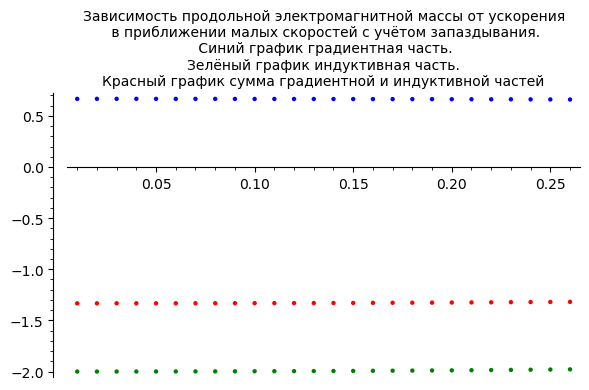

In [34]:
U = 3/5
(
    list_plot([[v[0], v[1]/U] for v in mass_array]) +
    list_plot([[v[0], v[2]/U] for v in mass_array], color = "green") +
    list_plot([[v[0], (v[1]+v[2])/U] for v in mass_array], color = "red")
) .show(title = 
        "Зависимость продольной электромагнитной массы от ускорения\n"
        " в приближении малых скоростей с учётом запаздывания.\n"
        " Синий график градиентная часть.\n"
        "Зелёный график индуктивная часть.\n"
        "Красный график сумма градиентной и индуктивной частей")

$^3$ Обычно говорят, что электромагнитная масса равномерно заряженного сферического слоя с общим зарадом $e$ и радиусом $r$ равна $\frac{2}{3} \frac{e^2}{r c^2}$; если же заметить, что электростатическая энергия $u = \frac{1}{2} \frac{e^2}{r}$, то для массы находим как раз $\left(\frac{4}{3}\right) \frac{u}{c^2}$.

$^3$ Обычно говорят, что электромагнитная масса равномерно заряженной сферы с общим зарадом $e$ и радиусом $r$ равна $\frac{8}{5} \frac{e^2}{r c^2}$; если же заметить, что электростатическая энергия $u = \frac{6}{5} \frac{e^2}{r}$, то для массы находим как раз $\left(\frac{4}{3}\right) \frac{u}{c^2}$.